## Marketing Data Analysis

### Introduction

This dataset contains synthetic marketing data that simulates campaign performance across various states. The dataset records key metrics such as total touchpoints, state-specific responses (both web and phone), and conversion outcomes over a defined time period. Additional information on each campaign includes costs and identifiers, offering insights into marketing efforts and resource allocation.ers.

We will test the following hypotheses:

- **H1: Web Responses and Phone Responses Affect Conversions Differently:** Phone responses may have a stronger correlation with conversions compared to web responses, assuming personal communication leads to higher customer trust.
- **H2: State-Specific Variations:** Marketing efforts in more populous states (e.g., NJ, FL) may show higher response and conversion rates compared to smaller states, indicating a regional impact on campaign success.

### Import Libraries

In [11]:
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt 

### Loading the data

In [13]:
# Connect to an SQLite Database using the sqlite3 module in Python

database = "/Users/Administrator/Documents/Databases/marketing.db"
connection = sql3.connect(database)

In [14]:
# Write a query

sql_query = ''' SELECT * FROM 
                sqlite_master
                WHERE type = 'table';
            '''

In [15]:
# Create a cursor

cursor = connection.cursor()

In [16]:
# Execute a query with cursor

cursor.execute(sql_query)

In [17]:
print('The list of tables are:\n', cursor.fetchall())

The list of tables are:
 [('table', 'campaigns', 'campaigns', 2, 'CREATE TABLE "campaigns" (\n"TOTAL_TOUCH_COUNT" INTEGER,\n  "CAMPAIGN_NAME" TEXT,\n  "ORDER_DATE_DATE" TIMESTAMP,\n  "STATE" TEXT,\n  "TOUCH_PER_STATE" INTEGER,\n  "WEB_RESPONSES" INTEGER,\n  "PHONE_RESPONSES" INTEGER,\n  "DROP_DATE" TEXT,\n  "CONVERSION_COUNT" INTEGER,\n  "TOTAL_DEBT_AMT" INTEGER\n)'), ('table', 'campaigns_info', 'campaigns_info', 43, 'CREATE TABLE "campaigns_info" (\n"CAMPAIGN_NAME" TEXT,\n  "FILE_IDS_FIXED" TEXT,\n  "EXP_ID" TEXT,\n  "COSTS" REAL\n)')]


In [18]:
# Explore table 'campaigns'
campaigns_query = ''' SELECT *
                      FROM campaigns; 
                  '''

In [19]:
# Explore table 'campaigns_info'
campaigns_info_query = ''' SELECT *
                      FROM campaigns_info; 
                  '''

In [20]:
# Read the query
df_campaigns = pd.read_sql_query(campaigns_query, connection)

In [21]:
# Read the query
df_campaigns_info = pd.read_sql_query(campaigns_info_query, connection)

### Data inspection

In [23]:
# Return the first 5 rows
df_campaigns.head()

,TOTAL_TOUCH_COUNT,CAMPAIGN_NAME,ORDER_DATE_DATE,STATE,TOUCH_PER_STATE,WEB_RESPONSES,PHONE_RESPONSES,DROP_DATE,CONVERSION_COUNT,TOTAL_DEBT_AMT
0,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,OTHER,43,1,1,2019-10-04 00:00:00,1,0
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,NJ,619,4,4,2019-10-04 00:00:00,1,22768
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,FL,1207,4,4,2019-10-04 00:00:00,1,0
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,TX,1108,4,3,2019-10-04 00:00:00,1,37785
4,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,PA,346,1,1,2019-10-04 00:00:00,1,34538


In [24]:
# Return the first 5 rows
df_campaigns_info.head()

,CAMPAIGN_NAME,FILE_IDS_FIXED,EXP_ID,COSTS
0,CFN_10018_DS71_STCC_042920,1278,112,0.60
1,CFN_10019_DS72_STCC_042920,1279,112,0.61
2,CFN_10037_DS73_STCC_050520,1289,116,0.64
3,CFN_10038_DS74_STCC_050620,1288,116,0.62
4,CFN_10039_DS75_STCC_050620,1287,116,0.61


In [25]:
#  Return a tuple containing the number of rows and columns

df_campaigns.shape

(1936, 10)

In [26]:
#  Return a tuple containing the number of rows and columns

df_campaigns_info.shape

(81, 4)

In [27]:
# Return a statistically description of the data - numerical columns
df_campaigns.describe()

,TOTAL_TOUCH_COUNT,TOUCH_PER_STATE,WEB_RESPONSES,PHONE_RESPONSES,CONVERSION_COUNT,TOTAL_DEBT_AMT
count,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000
mean,43955.506198,1840.847107,5.530475,5.966942,1.205062,15884.846591
std,26438.944219,2870.331002,8.683175,10.396230,0.779449,38695.220151
min,390.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,20000.000000,278.500000,1.000000,1.000000,1.000000,0.000000
50%,40750.000000,732.000000,2.000000,2.000000,1.000000,0.000000
75%,61500.000000,1907.750000,6.000000,6.000000,1.000000,15604.000000
max,122250.000000,20657.000000,77.000000,175.000000,10.000000,431119.000000


In [28]:
# Print information about the DataFrame - quality of data & non-null values
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TOTAL_TOUCH_COUNT  1936 non-null   int64 
 1   CAMPAIGN_NAME      1936 non-null   object
 2   ORDER_DATE_DATE    1936 non-null   object
 3   STATE              1936 non-null   object
 4   TOUCH_PER_STATE    1936 non-null   int64 
 5   WEB_RESPONSES      1936 non-null   int64 
 6   PHONE_RESPONSES    1936 non-null   int64 
 7   DROP_DATE          1936 non-null   object
 8   CONVERSION_COUNT   1936 non-null   int64 
 9   TOTAL_DEBT_AMT     1936 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 151.4+ KB


In [29]:
# Print information about the DataFrame - quality of data & non-null values
df_campaigns_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CAMPAIGN_NAME   81 non-null     object 
 1   FILE_IDS_FIXED  81 non-null     object 
 2   EXP_ID          81 non-null     object 
 3   COSTS           81 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


In [30]:
#  Return data type of each column in the DataFrame (same as info())
df_campaigns.dtypes

TOTAL_TOUCH_COUNT     int64
CAMPAIGN_NAME        object
ORDER_DATE_DATE      object
STATE                object
TOUCH_PER_STATE       int64
WEB_RESPONSES         int64
PHONE_RESPONSES       int64
DROP_DATE            object
CONVERSION_COUNT      int64
TOTAL_DEBT_AMT        int64
dtype: object

In [31]:
# Return the label of each column in the DataFrame - list of columns
df_campaigns.columns

Index(['TOTAL_TOUCH_COUNT', 'CAMPAIGN_NAME', 'ORDER_DATE_DATE', 'STATE',
       'TOUCH_PER_STATE', 'WEB_RESPONSES', 'PHONE_RESPONSES', 'DROP_DATE',
       'CONVERSION_COUNT', 'TOTAL_DEBT_AMT'],
      dtype='object')

### Data Processing

In [33]:
# Rename columns

cols = ['total_touch_count', 'campaign_name','order_date', 'state', 'touch_per_state', 'web_responses', 'phone_responses', 'drop_date', 'conversion_count', 'total_debt_amt']

df_campaigns.columns = cols
df_campaigns

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
0,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,OTHER,43,1,1,2019-10-04 00:00:00,1,0
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,NJ,619,4,4,2019-10-04 00:00:00,1,22768
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,FL,1207,4,4,2019-10-04 00:00:00,1,0
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,TX,1108,4,3,2019-10-04 00:00:00,1,37785
4,7500,CFN_8026_DS01_STCC_041019,2019-03-30 00:00:00,PA,346,1,1,2019-10-04 00:00:00,1,34538
...,...,...,...,...,...,...,...,...,...,...
1931,10000,CFN_10099_D0S81_STCC_052720,2020-05-18 00:00:00,UT,139,1,1,5/27/20 0:00,1,0
1932,10000,CFN_10099_D0S81_STCC_052720,2020-05-18 00:00:00,AR,148,1,1,5/27/20 0:00,1,0
1933,10000,CFN_10099_D0S81_STCC_052720,2020-05-18 00:00:00,AL,187,1,1,5/27/20 0:00,1,0
1934,10000,CFN_10099_D0S81_STCC_052720,2020-05-18 00:00:00,RI,108,1,1,5/27/20 0:00,1,0


In [34]:
# Rename columns

cols = ['campaign_name', 'file_ids_fixed', 'exp_id', 'costs']

df_campaigns_info.columns = cols
df_campaigns_info

,campaign_name,file_ids_fixed,exp_id,costs
0,CFN_10018_DS71_STCC_042920,1278,112,0.60
1,CFN_10019_DS72_STCC_042920,1279,112,0.61
2,CFN_10037_DS73_STCC_050520,1289,116,0.64
3,CFN_10038_DS74_STCC_050620,1288,116,0.62
4,CFN_10039_DS75_STCC_050620,1287,116,0.61
...,...,...,...,...
76,CFN_9958_DS67_STCC_040820,1247,104,0.70
77,CFN_9978_DS68_STCC_041520,1256,108,0.69
78,CFN_9998_DS69_STCC_042220,1274,112,0.60
79,CFN_9999_DS70_STCC_042220,1275,112,0.60


In [35]:
# Return a new DataFrame where the data types has been changed

df_campaigns['campaign_name'] = df_campaigns['campaign_name'].astype(str)
df_campaigns_info['campaign_name'] = df_campaigns_info['campaign_name'].astype(str)

In [36]:
# Convert string Date time columns into Python Date time objects

df_campaigns['order_date'] = pd.to_datetime(df_campaigns['order_date'])
df_campaigns['drop_date'] = pd.to_datetime(df_campaigns['drop_date'], format='mixed')

In [37]:
#  Check data type of each column

df_campaigns.dtypes

total_touch_count             int64
campaign_name                object
order_date           datetime64[ns]
state                        object
touch_per_state               int64
web_responses                 int64
phone_responses               int64
drop_date            datetime64[ns]
conversion_count              int64
total_debt_amt                int64
dtype: object

### Filtering of Data

In [39]:
# All data regarding the campaigns (Filter based on one column)

df_campaigns['campaign_name']

0         CFN_8026_DS01_STCC_041019
1         CFN_8026_DS01_STCC_041019
2         CFN_8026_DS01_STCC_041019
3         CFN_8026_DS01_STCC_041019
4         CFN_8026_DS01_STCC_041019
                   ...             
1931    CFN_10099_D0S81_STCC_052720
1932    CFN_10099_D0S81_STCC_052720
1933    CFN_10099_D0S81_STCC_052720
1934    CFN_10099_D0S81_STCC_052720
1935    CFN_10099_D0S81_STCC_052720
Name: campaign_name, Length: 1936, dtype: object

In [40]:
# Campaign names & dates (Filter based on two columns)

df_campaigns[['campaign_name', 'order_date']]

,campaign_name,order_date
0,CFN_8026_DS01_STCC_041019,2019-03-30
1,CFN_8026_DS01_STCC_041019,2019-03-30
2,CFN_8026_DS01_STCC_041019,2019-03-30
3,CFN_8026_DS01_STCC_041019,2019-03-30
4,CFN_8026_DS01_STCC_041019,2019-03-30
...,...,...
1931,CFN_10099_D0S81_STCC_052720,2020-05-18
1932,CFN_10099_D0S81_STCC_052720,2020-05-18
1933,CFN_10099_D0S81_STCC_052720,2020-05-18
1934,CFN_10099_D0S81_STCC_052720,2020-05-18


In [41]:
#  Campaigns with total touches > 1000 (Filter based on one condition)

df_campaigns[df_campaigns['touch_per_state'] > 1000]

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785
28,7500,CFN_8046_DS02_STCC_042419,2019-04-14,TX,1018,7,3,2019-04-24,1,0
31,7500,CFN_8046_DS02_STCC_042419,2019-04-14,NY,1146,6,8,2019-04-24,1,0
34,7500,CFN_8046_DS02_STCC_042419,2019-04-14,FL,1021,6,4,2019-04-24,1,0
...,...,...,...,...,...,...,...,...,...,...
1915,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,FL,1378,1,1,2020-05-27,1,0
1916,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,TX,1375,1,1,2020-05-27,1,0
1918,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,CA,1419,1,1,2020-05-27,1,0
1923,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,NY,1121,1,1,2020-05-27,1,0


In [42]:
# Filter based on two conditions

df_campaigns[(df_campaigns['web_responses'] > 4) | (df_campaigns['phone_responses'] > 8)]

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
7,7500,CFN_8026_DS01_STCC_041019,2019-03-30,CA,984,5,3,2019-10-04,1,0
26,7500,CFN_8046_DS02_STCC_042419,2019-04-14,NJ,695,6,4,2019-04-24,1,0
27,7500,CFN_8046_DS02_STCC_042419,2019-04-14,CA,966,9,9,2019-04-24,2,49119
28,7500,CFN_8046_DS02_STCC_042419,2019-04-14,TX,1018,7,3,2019-04-24,1,0
31,7500,CFN_8046_DS02_STCC_042419,2019-04-14,NY,1146,6,8,2019-04-24,1,0
...,...,...,...,...,...,...,...,...,...,...
1754,35750,CFN_10038_DS74_STCC_050620,2020-04-25,FL,5218,7,7,2020-06-05,1,34224
1768,35750,CFN_10037_DS73_STCC_050520,2020-04-25,OTHER,3,1,15,2020-05-05,1,0
1772,35750,CFN_10037_DS73_STCC_050520,2020-04-25,TX,4821,7,8,2020-05-05,1,92090
1774,35750,CFN_10037_DS73_STCC_050520,2020-04-25,CA,6995,5,11,2020-05-05,1,0


In [43]:
# Filter based on boolean mask (IN SQL analogue)

df_campaigns[df_campaigns['state'].isin(['TX', 'FL', 'NY'])]

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785
6,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NY,977,4,6,2019-10-04,1,0
28,7500,CFN_8046_DS02_STCC_042419,2019-04-14,TX,1018,7,3,2019-04-24,1,0
31,7500,CFN_8046_DS02_STCC_042419,2019-04-14,NY,1146,6,8,2019-04-24,1,0
...,...,...,...,...,...,...,...,...,...,...
1891,15750,CFN_10098_DS80_STCC_052720,2020-05-18,TX,2064,1,1,2020-05-27,1,0
1895,15750,CFN_10098_DS80_STCC_052720,2020-05-18,FL,2265,1,1,2020-05-27,1,0
1915,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,FL,1378,1,1,2020-05-27,1,0
1916,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,TX,1375,1,1,2020-05-27,1,0


In [44]:
# Filter based on boolean mask (IN SQL analogue)

df_campaigns[df_campaigns['web_responses'].isin([4, 5, 6])]

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NJ,619,4,4,2019-10-04,1,22768
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785
6,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NY,977,4,6,2019-10-04,1,0
7,7500,CFN_8026_DS01_STCC_041019,2019-03-30,CA,984,5,3,2019-10-04,1,0
...,...,...,...,...,...,...,...,...,...,...
1684,71500,CFN_10018_DS71_STCC_042920,2020-04-20,VA,3211,4,4,2020-04-29,1,0
1750,35750,CFN_10038_DS74_STCC_050620,2020-04-25,CA,6900,4,1,2020-06-05,1,0
1769,35750,CFN_10037_DS73_STCC_050520,2020-04-25,TN,992,4,1,2020-05-05,1,0
1770,35750,CFN_10037_DS73_STCC_050520,2020-04-25,NY,3870,4,5,2020-05-05,1,0


In [45]:
df_campaigns[df_campaigns['order_date'] > '2020-01-01']

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
1144,61500,CFN_9718_DS49_STCC_011520,2020-05-01,OTHER,44,1,8,2020-01-15,1,0
1145,61500,CFN_9718_DS49_STCC_011520,2020-05-01,NV,1346,6,3,2020-01-15,1,0
1146,61500,CFN_9718_DS49_STCC_011520,2020-05-01,TX,8429,26,11,2020-01-15,2,85240
1147,61500,CFN_9718_DS49_STCC_011520,2020-05-01,MA,2088,5,8,2020-01-15,1,0
1148,61500,CFN_9718_DS49_STCC_011520,2020-05-01,CA,9726,29,23,2020-01-15,6,191392
...,...,...,...,...,...,...,...,...,...,...
1931,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,UT,139,1,1,2020-05-27,1,0
1932,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AR,148,1,1,2020-05-27,1,0
1933,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AL,187,1,1,2020-05-27,1,0
1934,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,RI,108,1,1,2020-05-27,1,0


In [46]:
# Get unique order dates using filtering based on a condition (boolean mask )

df_campaigns[df_campaigns['order_date'] > '2020-01-01']['order_date'].unique()

<DatetimeArray>
['2020-05-01 00:00:00', '2020-11-01 00:00:00', '2020-01-18 00:00:00',
 '2020-01-25 00:00:00', '2020-01-31 00:00:00', '2020-08-02 00:00:00',
 '2020-02-15 00:00:00', '2020-02-22 00:00:00', '2020-02-29 00:00:00',
 '2020-07-03 00:00:00', '2020-03-14 00:00:00', '2020-03-21 00:00:00',
 '2020-03-28 00:00:00', '2020-06-04 00:00:00', '2020-04-14 00:00:00',
 '2020-04-20 00:00:00', '2020-04-25 00:00:00', '2020-03-05 00:00:00',
 '2020-05-19 00:00:00', '2020-05-18 00:00:00']
Length: 20, dtype: datetime64[ns]

In [47]:
#  Filter rows where a column contains the substring '32' (LIKE SQL analogue)

df_campaigns[df_campaigns['campaign_name'].str.contains('32')]

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt
760,81500,CFN_9499_DS32_STCC_103019,2019-10-18,OTHER,21,1,6,2019-10-30,1,0
761,81500,CFN_9499_DS32_STCC_103019,2019-10-18,OK,1095,1,1,2019-10-30,1,0
762,81500,CFN_9499_DS32_STCC_103019,2019-10-18,CA,15160,21,25,2019-10-30,1,19484
763,81500,CFN_9499_DS32_STCC_103019,2019-10-18,TX,16827,28,26,2019-10-30,4,168204
764,81500,CFN_9499_DS32_STCC_103019,2019-10-18,LA,1056,2,1,2019-10-30,1,0
...,...,...,...,...,...,...,...,...,...,...
1859,10000,CFN_10059_DS78_STCC_051320,2020-03-05,RI,68,1,1,2020-05-13,1,0
1860,10000,CFN_10059_DS78_STCC_051320,2020-03-05,KY,157,1,1,2020-05-13,1,0
1861,10000,CFN_10059_DS78_STCC_051320,2020-03-05,NE,83,1,1,2020-05-13,1,0
1862,10000,CFN_10059_DS78_STCC_051320,2020-03-05,DE,64,1,1,2020-05-13,1,0


In [48]:
# Get campaigns and web respones using filtering based on a condition

df_campaigns[df_campaigns['conversion_count'] >= 8][['campaign_name', 'web_responses']]

,campaign_name,web_responses
1058,CFN_9638_DS45_STCC_121119,37
1073,CFN_9658_DS46_STCC_122419,47
1195,CFN_9738_DS51_STCC_012220,34
1289,CFN_9778_DS55_STCC_020520,47
1293,CFN_9778_DS55_STCC_020520,37
1340,CFN_9798_DS57_STCC_021220,55


#### GROUP BY

In [50]:
# Получить количество касаний для каждой кампании (?)

df1 = df_campaigns.groupby('campaign_name')['touch_per_state'].sum().reset_index()

In [51]:
df1

,campaign_name,touch_per_state
0,CFN_10018_DS71_STCC_042920,71520
1,CFN_10019_DS72_STCC_042920,10018
2,CFN_10037_DS73_STCC_050520,35753
3,CFN_10038_DS74_STCC_050620,35764
4,CFN_10039_DS75_STCC_050620,10025
...,...,...
76,CFN_9958_DS67_STCC_040820,81512
77,CFN_9978_DS68_STCC_041520,81529
78,CFN_9998_DS69_STCC_042220,71538
79,CFN_9999_DS70_STCC_042220,10021


In [52]:
# Получить количество кампаний в каждом штате

df_campaigns.groupby("state")["campaign_name"].count().reset_index()

,state,campaign_name
0,AL,81
1,AR,81
2,AZ,81
3,CA,81
4,DE,81
5,FL,77
6,IA,81
7,IN,81
8,KY,81
9,LA,81


In [53]:
# Получить среднее количество веб-реакций для каждой кампании

df_campaigns.groupby('campaign_name')['web_responses'].mean().reset_index()

,campaign_name,web_responses
0,CFN_10018_DS71_STCC_042920,5.041667
1,CFN_10019_DS72_STCC_042920,1.041667
2,CFN_10037_DS73_STCC_050520,2.083333
3,CFN_10038_DS74_STCC_050620,2.083333
4,CFN_10039_DS75_STCC_050620,1.000000
...,...,...
76,CFN_9958_DS67_STCC_040820,8.333333
77,CFN_9978_DS68_STCC_041520,9.083333
78,CFN_9998_DS69_STCC_042220,5.083333
79,CFN_9999_DS70_STCC_042220,1.166667


In [54]:
#  Получить максимальное количество телефонных реакций для каждой кампании

df_campaigns.groupby("campaign_name")["phone_responses"].max().reset_index()

,campaign_name,phone_responses
0,CFN_10018_DS71_STCC_042920,24
1,CFN_10019_DS72_STCC_042920,3
2,CFN_10037_DS73_STCC_050520,15
3,CFN_10038_DS74_STCC_050620,7
4,CFN_10039_DS75_STCC_050620,3
...,...,...
76,CFN_9958_DS67_STCC_040820,40
77,CFN_9978_DS68_STCC_041520,40
78,CFN_9998_DS69_STCC_042220,39
79,CFN_9999_DS70_STCC_042220,3


In [55]:
# multi level grouping 

df_campaigns.groupby(['state', 'order_date'])["phone_responses"].max().reset_index()

,state,order_date,phone_responses
0,AL,2019-02-08,1
1,AL,2019-03-10,2
2,AL,2019-03-30,1
3,AL,2019-04-14,1
4,AL,2019-04-20,1
...,...,...,...
1360,VA,2020-05-19,1
1361,VA,2020-06-04,3
1362,VA,2020-07-03,4
1363,VA,2020-08-02,10


In [56]:
df_campaigns.groupby(['order_date', 'state'])["phone_responses"].max().reset_index()

,order_date,state,phone_responses
0,2019-02-08,AL,1
1,2019-02-08,AR,4
2,2019-02-08,AZ,1
3,2019-02-08,CA,29
4,2019-02-08,DE,1
...,...,...,...
1360,2020-11-01,RI,5
1361,2020-11-01,TN,3
1362,2020-11-01,TX,36
1363,2020-11-01,UT,5


In [57]:
# group by using different columns

df_campaigns.groupby(['order_date', 'state']).agg({'phone_responses': ['max'], 'web_responses': ['min']}).reset_index()

,order_date,state,phone_responses,web_responses
,,,max,min
0,2019-02-08,AL,1,2
1,2019-02-08,AR,4,4
2,2019-02-08,AZ,1,3
3,2019-02-08,CA,29,28
4,2019-02-08,DE,1,1
...,...,...,...,...
1360,2020-11-01,RI,5,1
1361,2020-11-01,TN,3,1
1362,2020-11-01,TX,36,1


In [58]:
# filtering using  group by using different columns

df_campaigns[df_campaigns['state'] == 'NY'].groupby(['order_date', 'state']).agg({'phone_responses': ['max'], 'web_responses': ['min']}).reset_index()

,order_date,state,phone_responses,web_responses
,,,max,min
0,2019-02-08,NY,33,20
1,2019-03-10,NY,20,10
2,2019-03-30,NY,6,4
3,2019-04-14,NY,8,6
4,2019-04-20,NY,9,2
5,2019-05-05,NY,26,26
6,2019-05-17,NY,18,21
7,2019-05-23,NY,27,21
8,2019-05-31,NY,22,21


In [59]:
# Aggregation by months

df_campaigns.groupby(df_campaigns.order_date.dt.month)['web_responses'].sum().reset_index()

,order_date,web_responses
0,1,878
1,2,945
2,3,830
3,4,567
4,5,913
5,6,657
6,7,892
7,8,1181
8,9,617
9,10,671


In [60]:
# value counts - a simplified Group By 

df_campaigns['campaign_name'].value_counts()

campaign_name
CFN_8026_DS01_STCC_041019     25
CFN_STD_DS03_8066_05_08_19    25
CFN_8046_DS02_STCC_042419     25
CFN_10098_DS80_STCC_052720    24
CFN_9739_DS52_STBW_012220     24
                              ..
CFN_9398_DS25_STCC_092519     23
CFN_9399_DS26_STCC_092519     23
CFN_9359_DS22_60K_091119      23
CFN_9378_DS23_STCC_091819     22
CFN_9379_DS24_STCC_091819     22
Name: count, Length: 81, dtype: int64

In [61]:
df_campaigns.groupby('campaign_name')['campaign_name'].count()

campaign_name
CFN_10018_DS71_STCC_042920    24
CFN_10019_DS72_STCC_042920    24
CFN_10037_DS73_STCC_050520    24
CFN_10038_DS74_STCC_050620    24
CFN_10039_DS75_STCC_050620    24
                              ..
CFN_9958_DS67_STCC_040820     24
CFN_9978_DS68_STCC_041520     24
CFN_9998_DS69_STCC_042220     24
CFN_9999_DS70_STCC_042220     24
CFN_STD_DS03_8066_05_08_19    25
Name: campaign_name, Length: 81, dtype: int64

In [62]:
# transform function (like window function in SQL) - create a new column using group by without any joins

df_campaigns['state_mean'] = df_campaigns.groupby('state')['phone_responses'].transform('mean')
df_campaigns

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt,state_mean
0,7500,CFN_8026_DS01_STCC_041019,2019-03-30,OTHER,43,1,1,2019-10-04,1,0,10.567901
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NJ,619,4,4,2019-10-04,1,22768,12.283951
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0,20.597403
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785,14.487179
4,7500,CFN_8026_DS01_STCC_041019,2019-03-30,PA,346,1,1,2019-10-04,1,34538,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1931,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,UT,139,1,1,2020-05-27,1,0,1.888889
1932,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AR,148,1,1,2020-05-27,1,0,1.592593
1933,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AL,187,1,1,2020-05-27,1,0,2.012346
1934,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,RI,108,1,1,2020-05-27,1,0,1.580247


In [63]:
df_campaigns.groupby('state')['phone_responses'].transform('sum').reset_index()

,index,phone_responses
0,0,856
1,1,995
2,2,1586
3,3,1130
4,4,3
...,...,...
1931,1931,153
1932,1932,129
1933,1933,163
1934,1934,128


In [64]:
df_campaigns.groupby('state')['phone_responses'].sum().reset_index()

,state,phone_responses
0,AL,163
1,AR,129
2,AZ,190
3,CA,1928
4,DE,107
5,FL,1586
6,IA,202
7,IN,181
8,KY,149
9,LA,180


#### JOINS

In [66]:
# Updates the content of two DataFrame by merging them together

df_campaigns.merge(df_campaigns_info, how='left', left_on =['campaign_name'],  right_on =['campaign_name'])

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt,state_mean,file_ids_fixed,exp_id,costs
0,7500,CFN_8026_DS01_STCC_041019,2019-03-30,OTHER,43,1,1,2019-10-04,1,0,10.567901,662,46,0.62
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NJ,619,4,4,2019-10-04,1,22768,12.283951,662,46,0.62
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0,20.597403,662,46,0.62
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785,14.487179,662,46,0.62
4,7500,CFN_8026_DS01_STCC_041019,2019-03-30,PA,346,1,1,2019-10-04,1,34538,1.000000,662,46,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,UT,139,1,1,2020-05-27,1,0,1.888889,1323,120,0.68
1932,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AR,148,1,1,2020-05-27,1,0,1.592593,1323,120,0.68
1933,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AL,187,1,1,2020-05-27,1,0,2.012346,1323,120,0.68
1934,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,RI,108,1,1,2020-05-27,1,0,1.580247,1323,120,0.68


In [67]:
# Updates the content of two DataFrame by merging them together
# Получите все кампании и идентификатор эксперимента


df_campaigns.merge(df_campaigns_info, how='left', left_on=['campaign_name'], right_on=['campaign_name'])[['campaign_name', 'exp_id']]

,campaign_name,exp_id
0,CFN_8026_DS01_STCC_041019,46
1,CFN_8026_DS01_STCC_041019,46
2,CFN_8026_DS01_STCC_041019,46
3,CFN_8026_DS01_STCC_041019,46
4,CFN_8026_DS01_STCC_041019,46
...,...,...
1931,CFN_10099_D0S81_STCC_052720,120
1932,CFN_10099_D0S81_STCC_052720,120
1933,CFN_10099_D0S81_STCC_052720,120
1934,CFN_10099_D0S81_STCC_052720,120


In [68]:
# Получите все кампании и идентификатор эксперимента

#df_join = df_campaigns.join(df_campaigns_info.set_index('campaign_name'), on='campaign_name', how='left')
#df_join[['campaign_name', 'exp_id']]
#df_join.groupby('campaign_name').first()

In [69]:
# Получите названия кампаний, штаты и расходы на отправку одного касания

df_campaigns.merge(df_campaigns_info, how='left', left_on=['campaign_name'], right_on=['campaign_name'])[['campaign_name', 'state', 'costs']]

,campaign_name,state,costs
0,CFN_8026_DS01_STCC_041019,OTHER,0.62
1,CFN_8026_DS01_STCC_041019,NJ,0.62
2,CFN_8026_DS01_STCC_041019,FL,0.62
3,CFN_8026_DS01_STCC_041019,TX,0.62
4,CFN_8026_DS01_STCC_041019,PA,0.62
...,...,...,...
1931,CFN_10099_D0S81_STCC_052720,UT,0.68
1932,CFN_10099_D0S81_STCC_052720,AR,0.68
1933,CFN_10099_D0S81_STCC_052720,AL,0.68
1934,CFN_10099_D0S81_STCC_052720,RI,0.68


In [70]:
# Добавьте в таблицу campaigns расходы на рассылку

df_join = df_campaigns.merge(df_campaigns_info, how='left', left_on=['campaign_name'], right_on=['campaign_name'])

df_join['mailing_cost'] = df_join.costs * df_join.touch_per_state
df_join = df_join.drop(['file_ids_fixed', 'exp_id', 'costs'], axis=1)
df_join

,total_touch_count,campaign_name,order_date,state,touch_per_state,web_responses,phone_responses,drop_date,conversion_count,total_debt_amt,state_mean,mailing_cost
0,7500,CFN_8026_DS01_STCC_041019,2019-03-30,OTHER,43,1,1,2019-10-04,1,0,10.567901,26.66
1,7500,CFN_8026_DS01_STCC_041019,2019-03-30,NJ,619,4,4,2019-10-04,1,22768,12.283951,383.78
2,7500,CFN_8026_DS01_STCC_041019,2019-03-30,FL,1207,4,4,2019-10-04,1,0,20.597403,748.34
3,7500,CFN_8026_DS01_STCC_041019,2019-03-30,TX,1108,4,3,2019-10-04,1,37785,14.487179,686.96
4,7500,CFN_8026_DS01_STCC_041019,2019-03-30,PA,346,1,1,2019-10-04,1,34538,1.000000,214.52
...,...,...,...,...,...,...,...,...,...,...,...,...
1931,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,UT,139,1,1,2020-05-27,1,0,1.888889,94.52
1932,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AR,148,1,1,2020-05-27,1,0,1.592593,100.64
1933,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,AL,187,1,1,2020-05-27,1,0,2.012346,127.16
1934,10000,CFN_10099_D0S81_STCC_052720,2020-05-18,RI,108,1,1,2020-05-27,1,0,1.580247,73.44


In [71]:
# Получите штаты и общие расходы на рассылку для штатов MA, TX, PA

df_join = df_campaigns.merge(df_campaigns_info, how='left', left_on=['campaign_name'], right_on=['campaign_name'])

df_join['mailing_cost'] = df_join.costs * df_join.touch_per_state

df_join[(df_join['state'].isin(['MA', 'TX', 'PA']))].groupby('state')["mailing_cost"].sum()

state
MA     76898.18
PA       705.92
TX    319602.07
Name: mailing_cost, dtype: float64

In [72]:
#  Получите среднее количество общих реакций и средние расходы по рекламным кампаниям. Отсортируйте их по убыванию среднего количества общих реакций

df_join = df_campaigns.merge(df_campaigns_info, how='left', left_on=['campaign_name'], right_on=['campaign_name'])

df_join['total_reaction'] = df_join.web_responses + df_join.phone_responses
df_join['expenses'] = df_join.costs * df_join.touch_per_state

df_join.groupby(['campaign_name']).agg({'total_reaction': ['mean'], 'expenses': ['mean']})

,total_reaction,expenses
,mean,mean
campaign_name,,
CFN_10018_DS71_STCC_042920,9.000000,1788.000000
CFN_10019_DS72_STCC_042920,2.166667,254.624167
CFN_10037_DS73_STCC_050520,5.000000,953.413333
CFN_10038_DS74_STCC_050620,3.875000,923.903333
CFN_10039_DS75_STCC_050620,2.166667,254.802083
...,...,...
CFN_9958_DS67_STCC_040820,15.458333,2377.433333
CFN_9978_DS68_STCC_041520,17.041667,2343.958750


### Hypothesis Testing & Results

#### Hypothesis 1: Web Responses and Phone Responses Affect Conversions Differently
- **H1**:  Phone responses may have a stronger correlation with conversions compared to web responses, assuming personal communication leads to higher customer trust.
- **Method**: Scatter plots of "Web Responses" vs "Conversion Rate" and "Phone Responses" vs "Conversion Rate" will visually help determine if web responses and phone responses affect conversions differently.

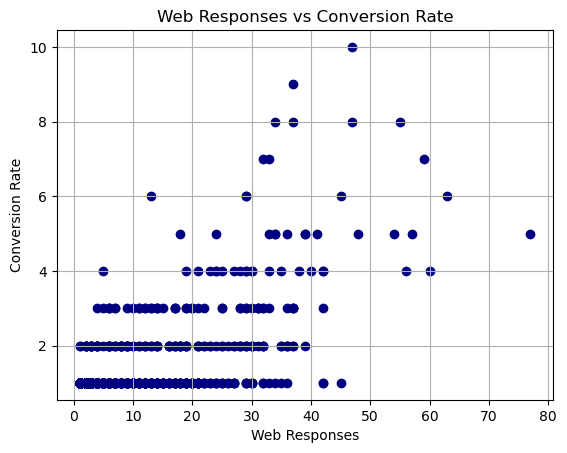

In [75]:
# Web Responses

web_responses = df_campaigns['web_responses']
conversion_count = df_campaigns['conversion_count']

plt.scatter(web_responses, conversion_count, color = 'navy')

plt.title('Web Responses vs Conversion Rate')
plt.xlabel('Web Responses')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

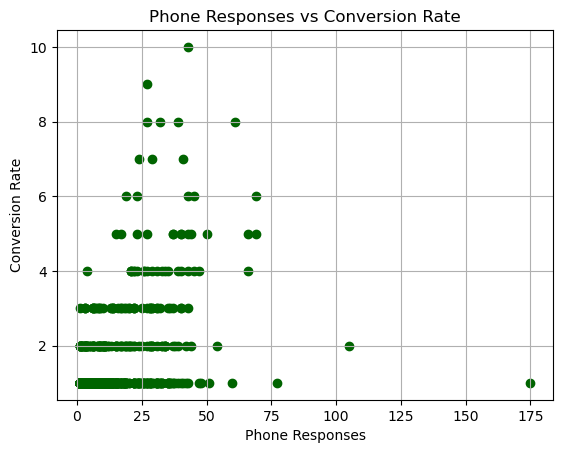

In [76]:
# Phone Responses

phone_responses = df_campaigns['phone_responses']
conversion_count = df_campaigns['conversion_count']

plt.scatter(phone_responses, conversion_count, color = 'darkgreen')

plt.title('Phone Responses vs Conversion Rate')
plt.xlabel('Phone Responses')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

#### Results:

Web and phone responses seem to affect conversions differently:
- Web responses have a consistent, somewhat linear relationship with conversions up to a certain point (around 40), but after this threshold the relationship weakens.
- Phone responses show a stronger impact at lower levels (up to 50), but the relationship flattens after that, suggesting diminishing returns with increasing phone responses.

#### Hypothesis 2: State-Specific Variations
- **H2**:  Marketing efforts in more populous states (e.g., NJ, FL) may show higher response and conversion rates compared to smaller states, indicating a regional impact on campaign success.
- **Method**:  We can use a bar plot to show the average conversion rates for each state, giving a clear visual of state-by-state variations.

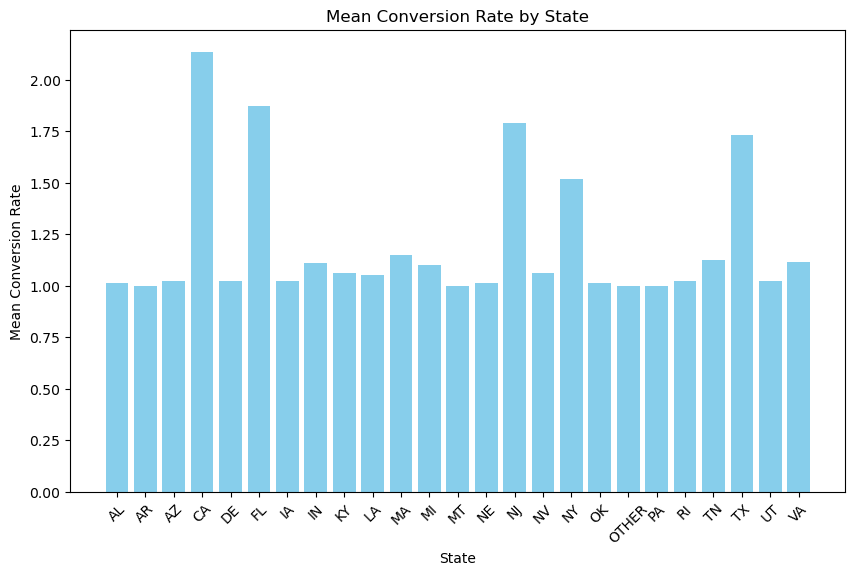

In [107]:
# Calculate mean conversion by state
mean_conversion_by_state = df_campaigns.groupby('state')['conversion_count'].mean().reset_index()

# Bar plot of mean conversion by state
plt.figure(figsize=(10,6))
plt.bar(mean_conversion_by_state['state'], mean_conversion_by_state['conversion_count'], color='skyblue')
plt.title('Mean Conversion Rate by State')
plt.xlabel('State')
plt.ylabel('Mean Conversion Rate')
plt.xticks(rotation=45)
plt.show()

#### Results:

State-by-state variations in conversion rates do exist, with AZ/CA outperforming AR/AL. Populous states like CA and FL support the hypothesis by showing higher conversion rates, but NJ and TX do not, suggesting factors beyond population size may influence conversion success.

### Complimentary Visualization Insights

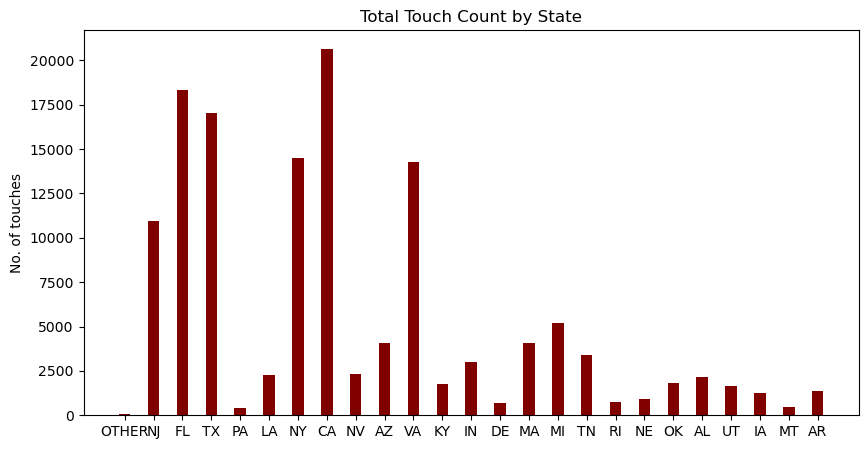

In [85]:
# Total Touch Count by State

state = df_campaigns['state']
touch_per_state = df_campaigns['touch_per_state']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(state, touch_per_state, color ='maroon', 
        width = 0.4)

plt.ylabel("No. of touches")
plt.title("Total Touch Count by State")
plt.show()

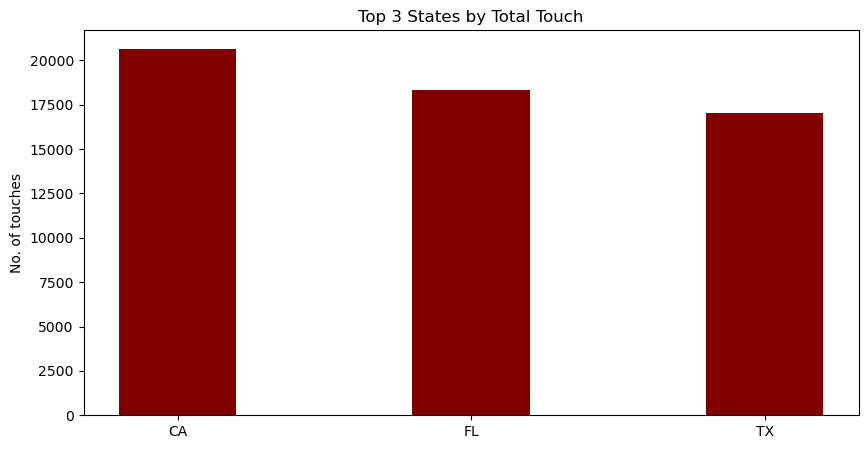

In [86]:
# Top 3 States by Total Touch

# Sorting the data by touch_per_state in descending order and selecting the top 3
top_3_states = df_campaigns.sort_values(by='touch_per_state', ascending=False).head(3)

state = top_3_states['state']
touch_per_state = top_3_states['touch_per_state']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(state, touch_per_state, color ='maroon', 
        width = 0.4)

plt.ylabel("No. of touches")
plt.title("Top 3 States by Total Touch")
plt.show()

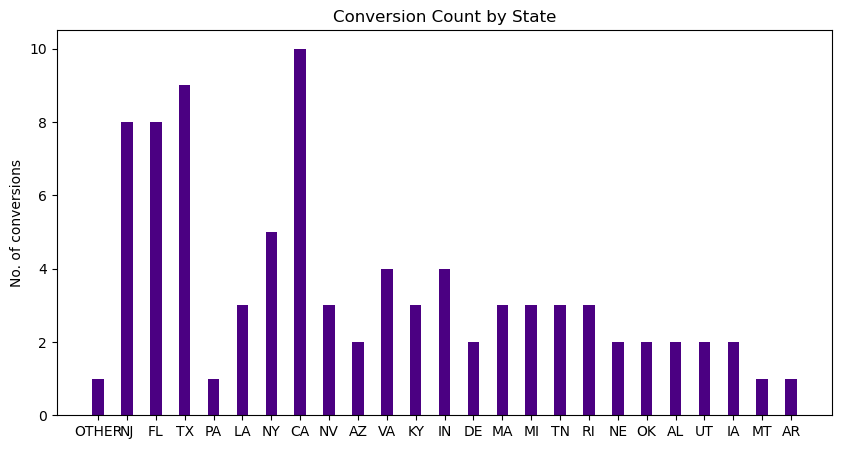

In [87]:
# Conversion Count by State

state = df_campaigns['state']
conversion_count = df_campaigns['conversion_count']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(state, conversion_count, color ='indigo', 
        width = 0.4)

plt.ylabel("No. of conversions")
plt.title("Conversion Count by State")
plt.show()

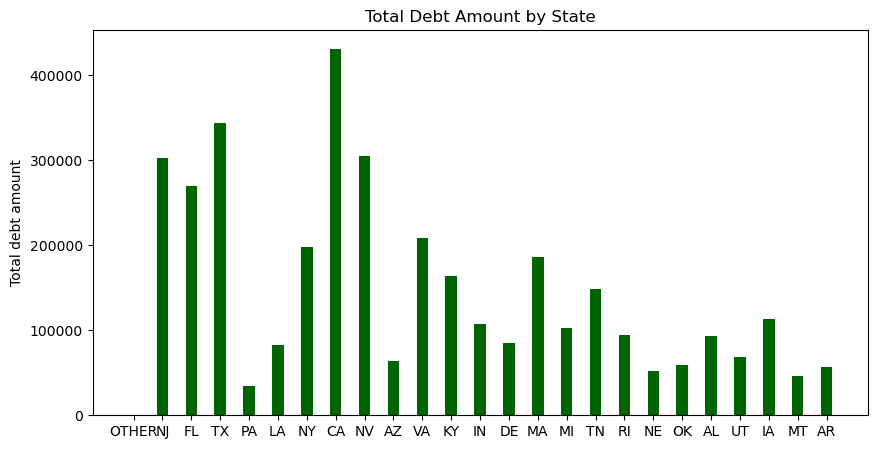

In [88]:
# Total Debt Amount by State

state = df_campaigns['state']
total_debt_amt = df_campaigns['total_debt_amt']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(state, total_debt_amt, color ='darkgreen', 
        width = 0.4)

plt.ylabel("Total debt amount")
plt.title("Total Debt Amount by State")
plt.show()

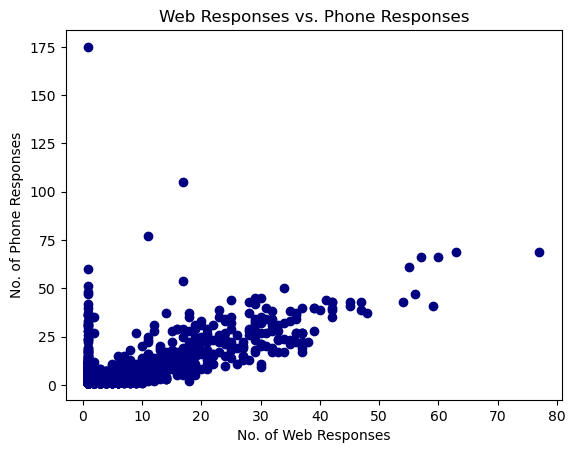

In [89]:
# Web Responses vs. Phone Responses

web_responses = df_campaigns['web_responses']
phone_responses = df_campaigns['phone_responses']

plt.scatter(web_responses, phone_responses, color = 'navy')

plt.xlabel("No. of Web Responses")
plt.ylabel("No. of Phone Responses")
plt.title("Web Responses vs. Phone Responses")
plt.show()

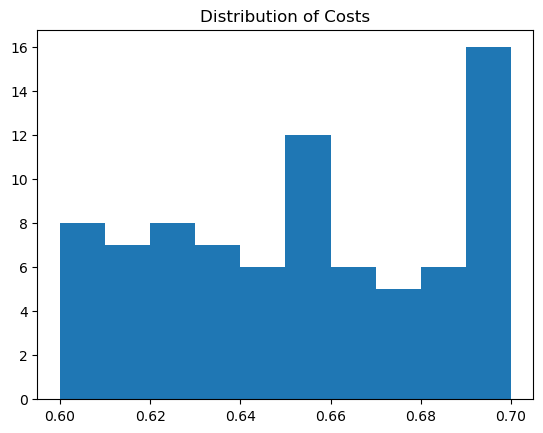

In [92]:
#  Distribution of Costs
costs = df_campaigns_info['costs']

plt.hist(costs)
plt.title("Distribution of Costs")
plt.show() 

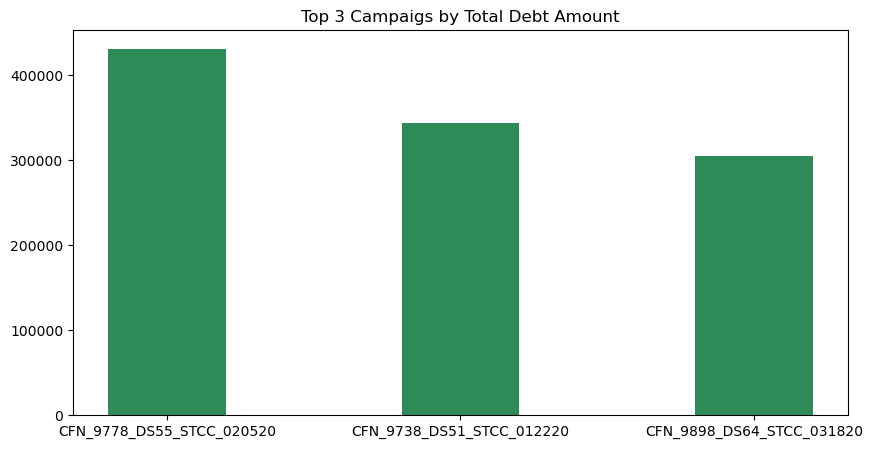

In [93]:
# Total Debt Amount by Campaign

# Sorting the data by total_debt_amt in descending order and selecting the top 3
top_campaigns = df_campaigns.sort_values(by='total_debt_amt', ascending=False).head(4)

campaign_name = top_campaigns['campaign_name']
total_debt_amt = top_campaigns['total_debt_amt']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(campaign_name, total_debt_amt, color ='seagreen', 
        width = 0.4)


plt.title("Top 3 Campaigs by Total Debt Amount")
plt.show()

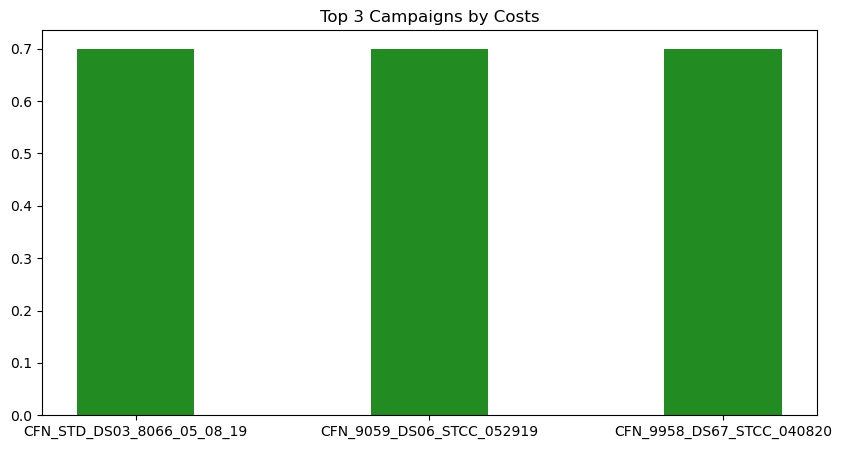

In [94]:
# Campaign Costs

# Sorting the data by costs in descending order and selecting the top 3
top_campaigns = df_campaigns_info.sort_values(by='costs', ascending=False).head(3)

campaign_name = top_campaigns['campaign_name']
costs = top_campaigns['costs']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(campaign_name, costs, color ='forestgreen', 
        width = 0.4)


plt.title("Top 3 Campaigns by Costs")
plt.show()